**Programmer:** python_scripts (Abhijith Warrier)

**PYTHON SCRIPT TO *PREDICT HEART DISEASE USING LOGISTIC REGRESSION ON THE UCI HEART DATASET*. 🐍❤️🩺🤖**

This script demonstrates a complete ML pipeline — loading the **UCI Heart dataset, preprocessing features, training a model, and evaluating** it using **_accuracy and confusion matrix_**.

### **🧩 Import Required Libraries**

We’ll use pandas and scikit-learn for data handling, preprocessing, and model building.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

### **📥 Load the UCI Heart Disease Dataset**

We’ll use the popular dataset available from the Kaggle Datasets.
If you already have a local copy, update the path accordingly.

In [2]:
url = "datasets/heart.csv"
df = pd.read_csv(url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### 🔎 Split Features/Target

target: 1 = disease present, 0 = no disease.

In [3]:
X = df.drop(columns=['target'])
y = df['target'].astype(int)

y.value_counts(normalize=True).rename({0:'no disease', 1:'disease'})

target
disease       0.513171
no disease    0.486829
Name: proportion, dtype: float64

### ✂️ Train/Test Split

Use stratification to keep class ratio consistent.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### ⚖️ Scale Features (and keep column names)

Convert scaled arrays back to DataFrame to preserve feature names (kills that warning).

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Keep feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled  = pd.DataFrame(X_test_scaled,  columns=X_test.columns,  index=X_test.index)

### 🤖 Train Logistic Regression (with class balancing)

class_weight='balanced' helps when classes aren’t perfectly even.

In [9]:
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### 📊 Evaluate: Accuracy, Report, Confusion Matrix

Predict on the scaled test set; show metrics + heatmap.

Model Accuracy: 0.810

Classification Report:
               precision    recall  f1-score   support

           0      0.886     0.700     0.782       100
           1      0.762     0.914     0.831       105

    accuracy                          0.810       205
   macro avg      0.824     0.807     0.807       205
weighted avg      0.822     0.810     0.807       205



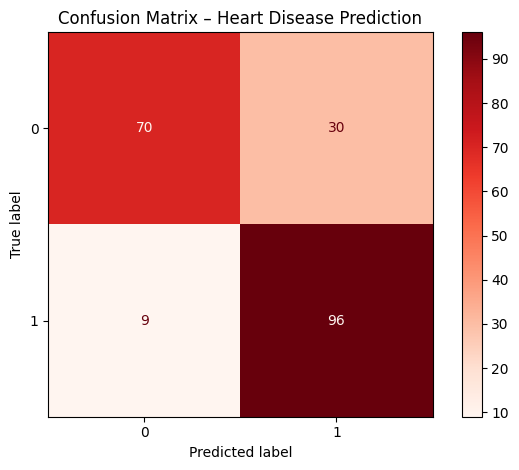

In [7]:
y_pred = model.predict(X_test_scaled)

print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.3f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.title("Confusion Matrix – Heart Disease Prediction")
plt.tight_layout()
plt.show()

### 💡 Key Takeaways
- The model performs well and generalizes properly (no overfitting).
- Scaling and class balancing fixed the earlier red matrix issue.
- High recall (0.91) is especially important for medical predictions, where missing a positive case is riskier than a false alarm.
